![image](https://github.com/eWaterCycle/ewatercycle/raw/main/docs/examples/logo.png)

# Generate forcing in eWaterCycle with ESMValTool

This notebooks shows how to generate forcing data for PCR-GLOBWB model using ERA5 data and [ESMValTool hydrological recipes](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html#pcr-globwb). More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import logging
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

logger = logging.getLogger("esmvalcore")
logger.setLevel(logging.WARNING)

In [2]:
import xarray as xr
from rich import print

import ewatercycle.forcing

Forcing for PCRGlobWB is created using the ESMValTool recipe. It produces one file per each variable: temperature, and precipitation. You can set the start and end date, and the region. See [eWaterCycle documentation](https://ewatercycle.readthedocs.io/en/latest/apidocs/ewatercycle.forcing.html#submodules) for more information. 

In [3]:
pcrglobwb_forcing = ewatercycle.forcing.sources["PCRGlobWBForcing"].generate(
    dataset="ERA5",
    start_time="1990-01-01T00:00:00Z",
    end_time="1990-12-31T00:00:00Z",
    shape="./data/Rhine/Rhine.shp",
    start_time_climatology="1990-01-01T00:00:00Z",
    end_time_climatology="1990-01-01T00:00:00Z",
)

{'auxiliary_data_dir': PosixPath('/home/sarah/GitHub/ewatercycle/docs/examples'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/sarah/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'default', 'CMIP6': 'default'},
 'exit_on_warning': False,
 'log_level': 'debug',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/home/sarah/temp/output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210714_152509/plots'),
 'preproc_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210714_152509/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'OBS6': [PosixPath('/home/sarah/temp/ForRecipe')]},
 'run_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210714_152509/run'),
 'save_intermediary_cubes': False,
 'work_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210714_152509/work'),
 'write_netcdf': True,
 'write_plots': True}
Shapefile /home/

In [4]:
print(pcrglobwb_forcing)

Forcing data for PCRGlobWB
--------------------------
Directory: /home/sarah/temp/output/recipe_pcrglobwb_20210714_152509/work/diagnostic_daily/script
Start time: 1990-01-01T00:00:00Z
End time: 1990-12-31T00:00:00Z
Shapefile: /home/sarah/GitHub/ewatercycle/docs/examples/data/Rhine/Rhine.shp
Additional information for model config:
  - temperatureNC: pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1990-1990_Rhine.nc
  - precipitationNC: pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1990-1990_Rhine.nc


### Plot forcing

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 23, lon: 31, time: 730)
Coordinates:
  * time       (time) datetime64[ns] 1989-01-01 1989-01-02 ... 1990-12-31
  * lat        (lat) float32 52.0 51.75 51.5 51.25 ... 47.25 47.0 46.75 46.5
  * lon        (lon) float32 4.251 4.501 4.751 5.001 ... 11.0 11.25 11.5 11.75
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 273.6 273.2 273.0 ... 271.6 268.9 267.0
    time_bnds  (time, bnds) datetime64[ns] 1988-12-31T12:00:00 ... 1990-12-31...
    lat_bnds   (lat, bnds) float32 51.88 52.12 51.62 51.88 ... 46.88 46.38 46.62
    lon_bnds   (lon, bnds) float32 4.125 4.375 4.375 4.625 ... 11.62 11.62 11.88
Attributes:
    comment:      Contains modified Copernicus Climate Change Service Informa...
    Conventions:  CF-1.7
    provenance:   <?xml version='1.0' encoding='ASCII'?>\n<prov:document xmln...
    software:     Created with ESMValTool v2.2.0
    caption:      Forcings for the 

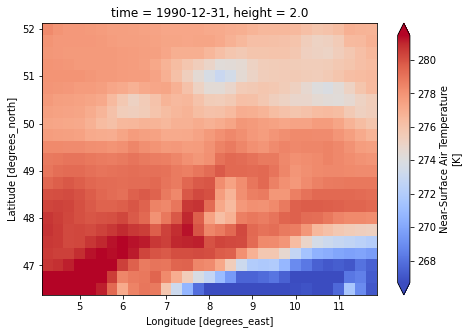

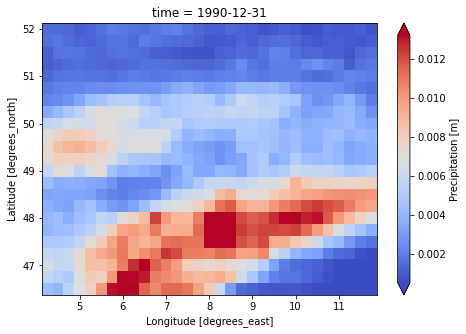

In [8]:
for file_name in [pcrglobwb_forcing.temperatureNC, pcrglobwb_forcing.precipitationNC]:
    dataset = xr.load_dataset(f"{pcrglobwb_forcing.directory}/{file_name}")
    print(dataset)
    print("------------------------")
    var = list(dataset.data_vars.keys())[0]
    dataset[var].isel(time=-1).plot(cmap="coolwarm", robust=True, size=5)